In [1]:
#Import pandas, tensorflow and keras
#dataset details: https://archive.ics.uci.edu/ml/datasets/covertype
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers
#Read the data from csv file
df = pd.read_csv('covtype.txt')
#Select predictors
x = df[df.columns[:54]]
#Target variable 
y = df["cover_type"]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
'''As y variable is multi class categorical variable, hence using softmax as activation function and sparse-categorical cross entropy as loss function.'''
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = model.fit(
 x_train, y_train,
 epochs= 26, batch_size = 60,
 validation_data = (x_test, y_test))

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 406708 samples, validate on 174304 samples
Epoch 1/26
406708/406708 [==============================] - 9s 22us/step - loss: 10.2351 - acc: 0.3650 - val_loss: 10.2545 - val_acc: 0.3638
Epoch 2/26
406708/406708 [==============================] - 8s 21us/step - loss: 10.2357 - acc: 0.3650 - val_loss: 10.2545 - val_acc: 0.3638
Epoch 3/26
406708/406708 [==============================] - 8s 20us/step - loss: 10.2357 - acc: 0.3650 - val_loss: 10.2545 - val_acc: 0.3638
Epoch 4/26
406708/406708 [==============================] - 9s 22us/step - loss: 10.2357 - acc: 0.3650 - val_loss: 10.2545 - val_acc: 0.3638
Epoch 5/26
406708/406708 [==============================] - 10s 26us/step - loss: 10.2357 - acc: 0.3650 - val_loss: 10.2545 - val_acc: 0.3638
Epoch 6/26
406708/406708 [==============================] - 8s 20us/step - loss: 10.2357 - acc: 0.3650 - val_loss: 10.2545

In [2]:
from sklearn import preprocessing
df = pd.read_csv('covtype.txt')
x = df[df.columns[:55]]
y = df["cover_type"]
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90, shuffle=True)
#Select numerical columns which needs to be normalized


In [3]:
train_norm = x_train[x_train.columns[0:10]]
test_norm = x_test[x_test.columns[0:10]]
# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())
# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

D:\anaconda\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


        elevation    aspect     slope  horizontal_distance_to_hydrology  \
152044   0.222366 -0.228639 -0.412503                          0.148486   
363373   1.980490 -0.469989  0.255453                          3.018822   
372733  -1.081933  0.271939  0.389044                         -0.867895   
572846  -1.164122 -0.157128 -0.278912                         -1.267860   
114145  -0.052787  0.861906  0.255453                         -0.279711   

        vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
152044                        0.149095                         1.336119   
363373                        4.443372                         0.168073   
372733                       -0.160093                        -0.241801   
572846                       -0.795646                        -0.461170   
114145                       -0.125739                         1.811419   

        hillshade_9am  hillshade_noon  hillshade_3pm  \
152044       1.002687        0.539776     

In [4]:
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(
 x_train, y_train,
 epochs= 26, batch_size = 60,
 validation_data = (x_test, y_test))

Train on 406708 samples, validate on 174304 samples
Epoch 1/26
406708/406708 [==============================] - 7s 18us/step - loss: 0.0273 - acc: 0.9923 - val_loss: 9.5856e-05 - val_acc: 1.0000
Epoch 2/26
406708/406708 [==============================] - 7s 17us/step - loss: 3.7290e-04 - acc: 0.9999 - val_loss: 0.0131 - val_acc: 0.9967
Epoch 3/26
406708/406708 [==============================] - 7s 18us/step - loss: 4.7717e-04 - acc: 0.9999 - val_loss: 4.3543e-05 - val_acc: 1.0000
Epoch 4/26
406708/406708 [==============================] - 7s 18us/step - loss: 1.8237e-04 - acc: 1.0000 - val_loss: 5.1647e-06 - val_acc: 1.0000
Epoch 5/26
406708/406708 [==============================] - 8s 19us/step - loss: 2.6785e-04 - acc: 0.9999 - val_loss: 2.9263e-05 - val_acc: 1.0000
Epoch 6/26
406708/406708 [==============================] - 8s 20us/step - loss: 2.0631e-04 - acc: 0.9999 - val_loss: 1.6120e-05 - val_acc: 1.0000
Epoch 7/26
406708/406708 [==============================] - 7s 18us/step -

In [5]:
#wow

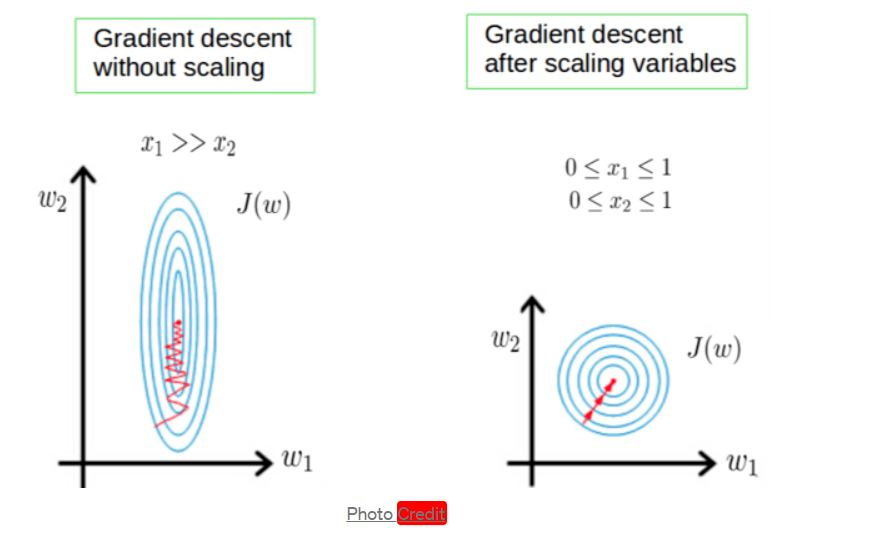

In [2]:
from IPython.display import Image
Image(filename='xxxScalemexxx.jpg')